In [22]:
import pandas as pd
# Open classified videos csv
df = pd.read_csv('./data/raw/Education_videos_7_classified.csv')
print(len(df))
df.head()

413883


,Unnamed: 0,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,text,classified_labels
0,0,Education,UC4avQL0dz2oTQtJqXyVfe8g,2019-11-17 12:43:19.304589,http://bit.ly/km-Kabbalah-Course / Excerpt fro...,0.0,oG4rYTF7WYQ,70,8.0,"daily,kabbalah,lesson,moments,michael,laitman,...",That's It We Are Ready To Bond - Kabbalah Mome...,2010-11-17 00:00:00,444.0,That's It We Are Ready To Bond - Kabbalah Mome...,['conference']
1,1,Education,UC4avQL0dz2oTQtJqXyVfe8g,2019-11-17 12:43:19.963060,http://bit.ly/km-Kabbalah-Course / Excerpt fro...,0.0,Psiklp-WC4k,72,2.0,"daily,kabbalah,lesson,moments,michael,laitman,...",Advancing Towards The Goal - Kabbalah Moments ...,2010-11-17 00:00:00,255.0,Advancing Towards The Goal - Kabbalah Moments ...,['tutorial or DIY']
2,2,Education,UC4avQL0dz2oTQtJqXyVfe8g,2019-11-17 12:43:20.570946,http://bit.ly/km-Kabbalah-Course / Excerpt fro...,0.0,4PAUpgXDYWg,127,1.0,"daily,kabbalah,lesson,moments,michael,laitman,...",A Cry To The Creator - Kabbalah Moments - Nove...,2010-11-17 00:00:00,214.0,A Cry To The Creator - Kabbalah Moments - Nove...,['tutorial or DIY']
3,3,Education,UC4avQL0dz2oTQtJqXyVfe8g,2019-11-17 12:43:21.242292,http://bit.ly/km-Kabbalah-Course / Excerpt fro...,0.0,DROFMmWO_7k,137,1.0,"daily,kabbalah,lesson,moments,michael,laitman,...",We Found Out At The Convention - Kabbalah Mome...,2010-11-16 00:00:00,200.0,We Found Out At The Convention - Kabbalah Mome...,['conference']
4,4,Education,UC4avQL0dz2oTQtJqXyVfe8g,2019-11-17 12:43:21.869033,http://bit.ly/km-Kabbalah-Course / Excerpt fro...,0.0,T54qFHPiPtY,212,4.0,"daily,kabbalah,lesson,moments,michael,laitman,...",Revealing The Wall - Kabbalah Moments - Novemb...,2010-11-16 00:00:00,230.0,Revealing The Wall - Kabbalah Moments - Novemb...,['tutorial or DIY']


In [2]:
# Open and clean time series
df_ts_r = pd.read_csv("./data/raw/df_timeseries_en.tsv.gz", compression="infer", sep="\t")

df_ts = df_ts_r.dropna()

df_ts['datetime'] = pd.to_datetime(df_ts['datetime'])
df_ts['month'] = df_ts['datetime'].dt.month
df_ts['year'] = df_ts['datetime'].dt.year
df_ts['day'] = df_ts['datetime'].dt.day
df_ts.head()

C:\Users\fpili\AppData\Local\Temp\ipykernel_2460\1308620356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['datetime'] = pd.to_datetime(df_ts['datetime'])
C:\Users\fpili\AppData\Local\Temp\ipykernel_2460\1308620356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['month'] = df_ts['datetime'].dt.month
C:\Users\fpili\AppData\Local\Temp\ipykernel_2460\1308620356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,month,year,day
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,3,7,2017,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1,7,2017,10
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1,7,2017,17
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0,7,2017,24
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0,7,2017,31


In [24]:
def create_channels_cat(df: pd.DataFrame):

    df_cat = df.copy()
    # Extract the first element from the list for consistency
    df_cat["classified_labels"] = df_cat["classified_labels"].apply(
        lambda x: x[0] if x else None
    )

    # Count the number of categories for each channel ids
    channels_cat = (
        df_cat.groupby("channel_id")["classified_labels"]
        .value_counts()
        .reset_index(name="count")
    )
    # Assign a weight to each category for each channel ids (count/total count)
    channels_cat["weights"] = channels_cat.groupby("channel_id")["count"].transform(
        lambda x: x / x.sum()
    )
    # Aggregate the categories and weights to lists
    result = (
        channels_cat.groupby("channel_id")
        .agg(categories=("classified_labels", list), weights=("weights", list))
        .reset_index()
    )
    return result

In [30]:
df['classified_labels'].iloc[0]

"['conference']"

In [25]:
# from utils import create_channels_cat
channels_cat = create_channels_cat(df)
channels_cat

,channel_id,categories,weights
0,UC--3ozenTzry39-xMqAPQlw,[[],[1.0]
1,UC--7oyGW0N7fMf164-ZXljQ,[[],[1.0]
2,UC--LAVm36WiCmqQbekV17qQ,[[],[1.0]
3,UC--MxpGXJ3LVD8KvlNzRlcA,[[],[1.0]
4,UC--QN7syH6Tj_9jVWhLshzQ,[[],[1.0]
...,...,...,...
3071,UCuEnyJNRt1-wM1CxvdqrNwQ,[[],[1.0]
3072,UCuEqPyLYfaz5CkAyAOEQGQg,[[],[1.0]
3073,UCuErSr7xeR763BzTJL7yJ7A,[[],[1.0]
3074,UCuEzMjakURKafZ7EJLoXhPw,[[],[1.0]


c:\Users\fpili\Desktop\ada-2024-project-sickada\utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["category_weight"] = filtered_df.apply(
c:\Users\fpili\Desktop\ada-2024-project-sickada\utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["category_weight"] = filtered_df.apply(


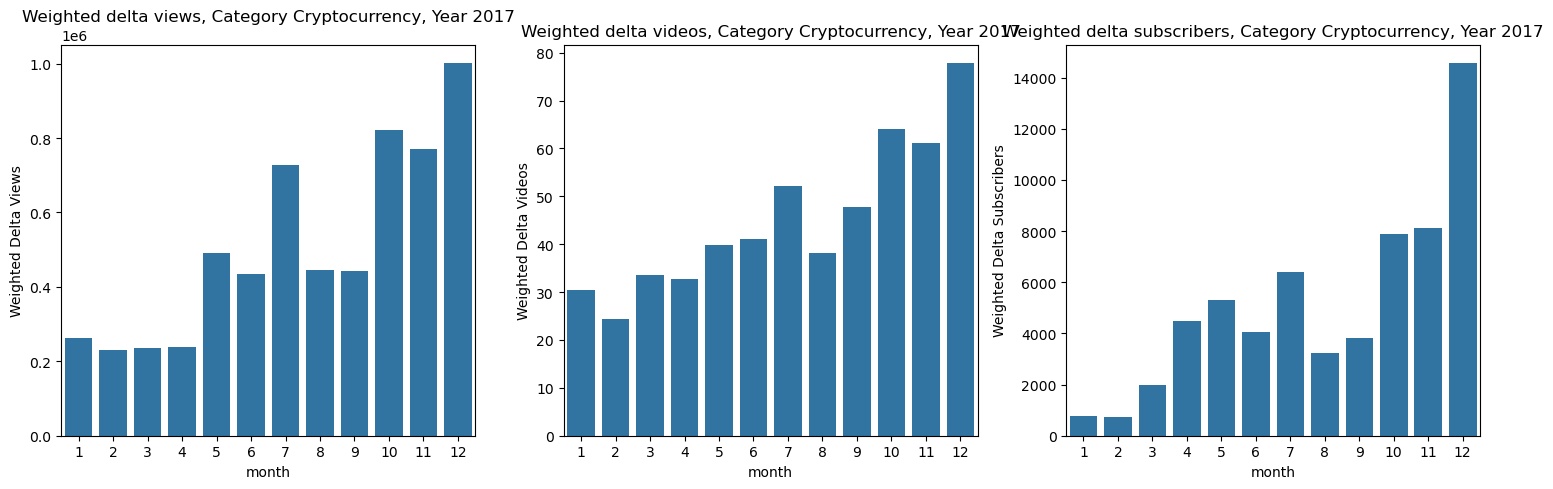

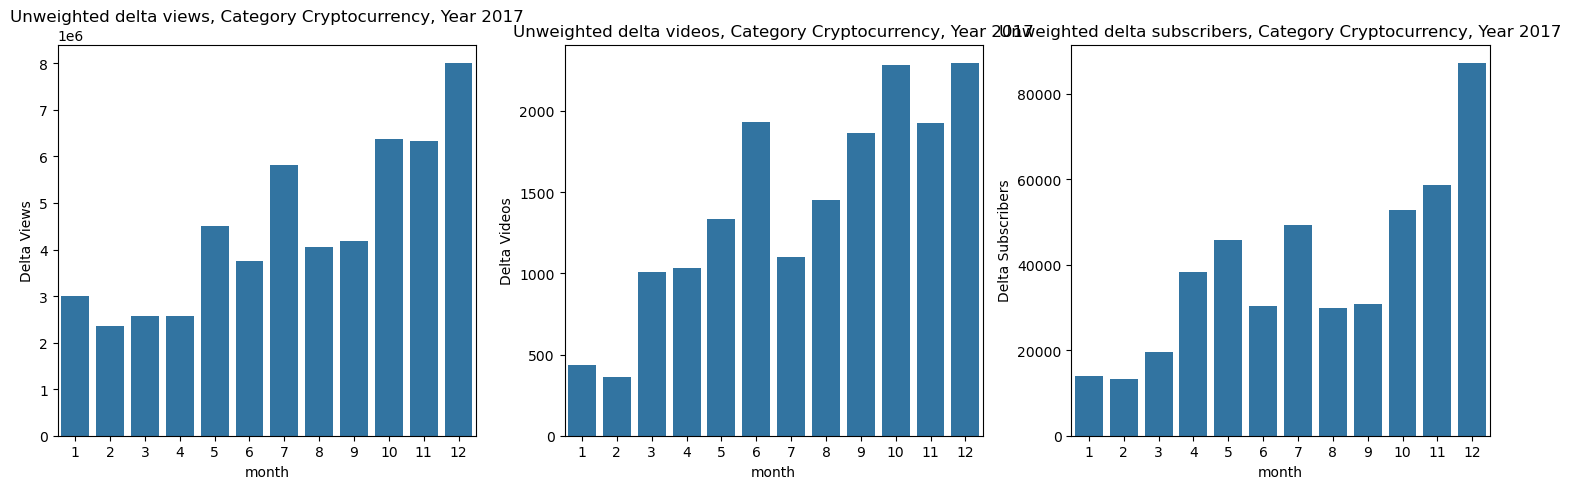

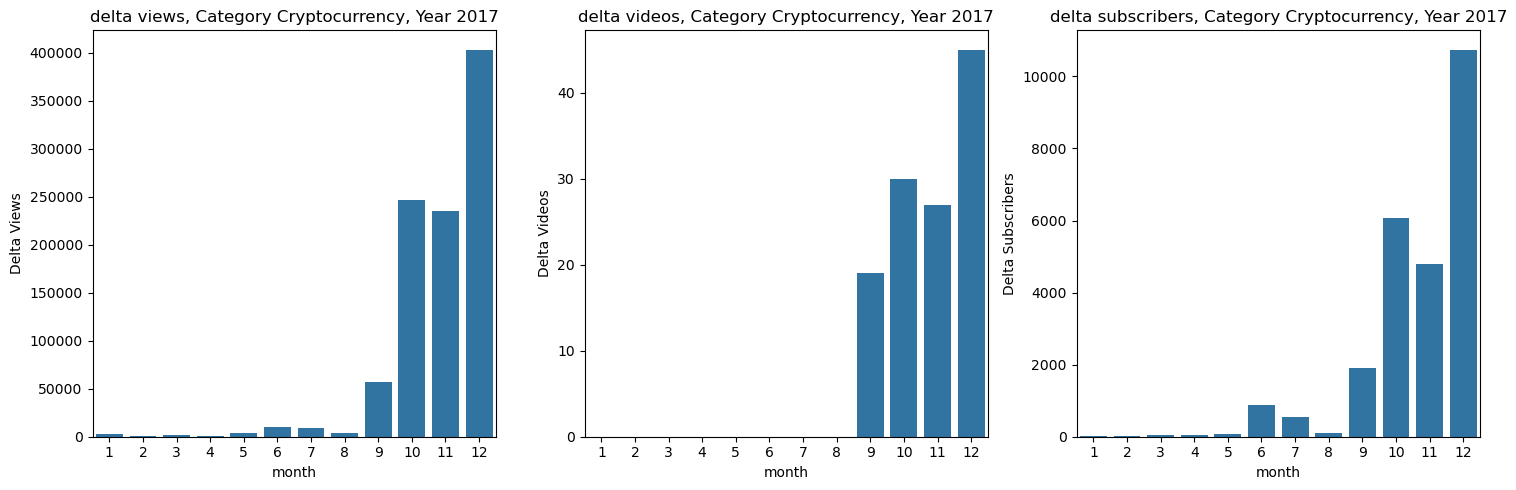

In [4]:
from utils import plot_weighted_timeseries, plot_unweighted_timeseries, plot_timeseries_single_category

plot_weighted_timeseries(df_ts, channels_cat, category='Cryptocurrency', year=2017)
plot_unweighted_timeseries(df_ts, channels_cat, category='Cryptocurrency', year=2017)

from utils import create_channel_cat_single
channel_cat_single = create_channel_cat_single(df)

plot_timeseries_single_category(df_ts, channel_cat_single, category='Cryptocurrency', year=2017)